# Dihedral scans



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyscf import gto, scf, mp
import py3Dmol

In [2]:
HARTREE2KCALMOL = 627.5094737775374055927342256

## Ethane dihedral

In [3]:
def get_atom_string(d_hcch=180.00):
    atom_string = f"""
    H
    H  1  1.7635
    H  1  1.7635  2  60.00
    C  1  1.0878  2  35.85  3  36.95
    C  4  1.5214  1  110.61  2  121.37
    H  5  1.0878  4  110.61  1  {d_hcch+120}
    H  5  1.0878  4  110.61  1  {d_hcch-120}
    H  5  1.0878  4  110.61  1  {d_hcch}
    """
    return atom_string

In [4]:
mol = gto.Mole()
mol.atom = get_atom_string()
mol.unit = "Angstrom"
mol.basis = "cc-pvtz"
mol.verbose = 1
mol.build()

In [5]:
d_hcch_scan = np.linspace(-180, 180, num=80)
d_hcch_energies = np.empty(d_hcch_scan.shape)

for i, d_hcch in enumerate(d_hcch_scan):
    mol.atom = get_atom_string(d_hcch=d_hcch)
    mol.build()
    mf = scf.RHF(mol)
    mf.run()
    mp2 = mp.MP2(mf)
    mp2.run()
    d_hcch_energies[i] = mp2.e_tot_scs

d_hcch_energies *= HARTREE2KCALMOL
d_hcch_energies -= np.min(d_hcch_energies)

df = pd.DataFrame({"r": d_hcch_scan, "e": d_hcch_energies})
df.to_csv("ethane-hcch-scan.csv", index=False)

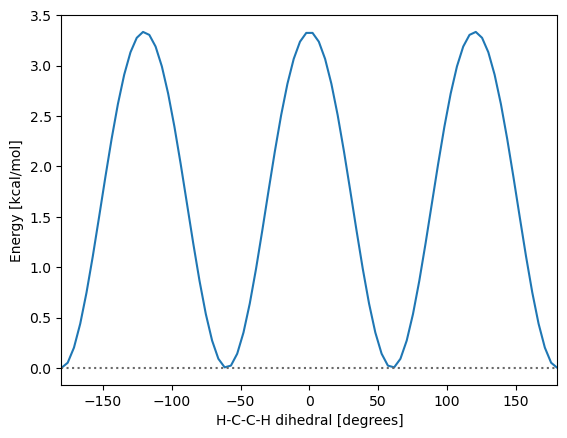

In [6]:
plt.plot(d_hcch_scan, d_hcch_energies)
plt.xlabel("H-C-C-H dihedral [degrees]")
plt.ylabel("Energy [kcal/mol]")
plt.xlim(-180, 180)
plt.axhline(y=0, color="dimgrey", linestyle=":")